In [3]:
import pandas as pd
import numpy as np
%matplotlib inline

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("C:\\Users\\shaleens\\Desktop\\Projects\\TimeSeriesUdacity\\TS Udemy Vids\\Time Series 2\\Hospitality Employees.csv", index_col=0, parse_dates=True)

In [6]:
df.index.freq = "MS"

In [7]:
df.head()

,CALEIH
DATE,
1990-01-01,1100.9
1990-02-01,1102.1
1990-03-01,1102.8
1990-04-01,1103.0
1990-05-01,1098.3


In [8]:
len(df)

348

In [10]:
df.rename(columns={'CALEIH':'Employees'}, inplace=True)

In [11]:
df.head()

,Employees
DATE,
1990-01-01,1100.9
1990-02-01,1102.1
1990-03-01,1102.8
1990-04-01,1103.0
1990-05-01,1098.3


[Text(0, 0.5, '#Employees'), Text(0.5, 0, 'Years')]

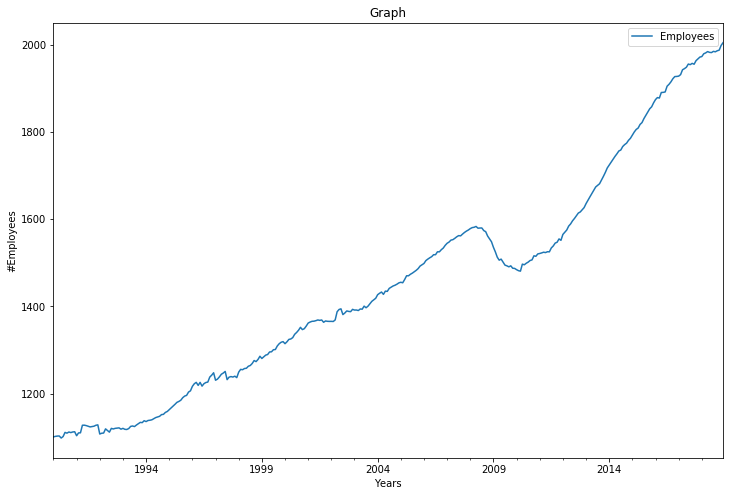

In [45]:
ax = df.plot(figsize = (12,8),title='Graph')
ax.set(xlabel = "Years", ylabel="#Employees")

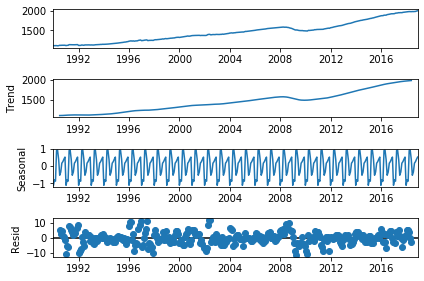

In [47]:
seasonal_decompose(df, model = 'add').plot();

In [17]:
stepwise_fit = auto_arima(df['Employees'], seasonal=True, m=12, trace=True, suppress_warnings=True).summary()

Performing stepwise search to minimize aic
Fit ARIMA: (2, 2, 2)x(1, 0, 1, 12) (constant=True); AIC=2033.339, BIC=2064.111, Time=1.333 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 12) (constant=True); AIC=2254.290, BIC=2261.983, Time=0.010 seconds
Fit ARIMA: (1, 2, 0)x(1, 0, 0, 12) (constant=True); AIC=2120.077, BIC=2135.463, Time=0.206 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 1, 12) (constant=True); AIC=2030.246, BIC=2045.631, Time=0.268 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 12) (constant=False); AIC=2252.292, BIC=2256.138, Time=0.009 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 12) (constant=True); AIC=2033.298, BIC=2044.837, Time=0.060 seconds
Fit ARIMA: (0, 2, 1)x(1, 0, 1, 12) (constant=True); AIC=2031.707, BIC=2050.940, Time=0.412 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 2, 12) (constant=True); AIC=2031.543, BIC=2050.775, Time=1.008 seconds
Fit ARIMA: (0, 2, 1)x(1, 0, 0, 12) (constant=True); AIC=2030.742, BIC=2046.128, Time=0.221 seconds
Fit ARIMA: (0, 2, 1)x(1, 0, 2, 12) (constant=True); AIC=2032.790,

In [18]:
stepwise_fit

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  348
Model:             SARIMAX(1, 2, 1)x(0, 0, 1, 12)   Log Likelihood               -1009.295
Date:                            Tue, 03 Mar 2020   AIC                           2028.591
Time:                                    16:53:07   BIC                           2047.823
Sample:                                         0   HQIC                          2036.249
                                            - 348                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0088      0.038      0.234      0.815      -0.065       0.083
ar.L1         -0.1176      0.074     -1.584      0.113      -0.263       0.028
ma.L1         -0.8337      0.030    -27.335      0.000      -0.893      -0.774
ma.S.L12      -0.1317      0.041     -3.226      0.001      -0.212      -0.052
sigma2        19.9156      0.783     25.434      0.000      18.381      21.450
===================================================================================
Ljung-Box (Q):                       33.44   Jarque-Bera (JB):               628.48
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.48   Skew:                            -0.64
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
# Train/Test Split:

In [20]:
train = df[:-12]
test = df[-12:]

In [21]:
train.tail()

,Employees
DATE,
2017-08-01,1957.3
2017-09-01,1955.3
2017-10-01,1963.5
2017-11-01,1967.6
2017-12-01,1971.7


In [22]:
test.head()

,Employees
DATE,
2018-01-01,1972.9
2018-02-01,1979.3
2018-03-01,1981.3
2018-04-01,1984.3
2018-05-01,1982.5


In [23]:
model = SARIMAX(train['Employees'], order=(1,2,1), seasonal_order=(0,0,1,12), enforce_invertibility=False)

In [24]:
res = model.fit()

In [25]:
start = len(train)
end = len(train) + len(test) - 1

prediction = res.predict(start=start,end=end,typ="levels")

In [26]:
prediction

2018-01-01    1976.142709
2018-02-01    1980.206932
2018-03-01    1983.343464
2018-04-01    1987.394610
2018-05-01    1991.584767
2018-06-01    1995.209970
2018-07-01    1999.774209
2018-08-01    2003.929550
2018-09-01    2008.735712
2018-10-01    2012.112025
2018-11-01    2016.100903
2018-12-01    2020.165461
Freq: MS, dtype: float64

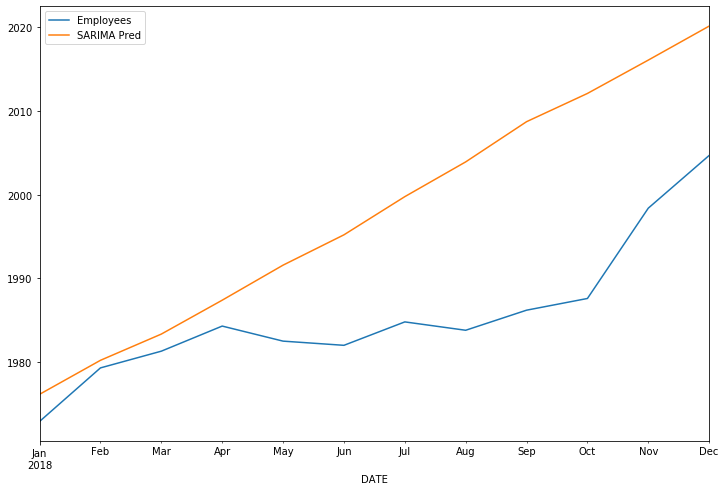

In [33]:
test['Employees'].plot(figsize=(12,8), legend=True)
prediction.rename("SARIMA Pred").plot(legend=True)

In [30]:
mse = mean_squared_error(test, prediction)
mse

214.3960189648328

In [32]:
rmse = np.sqrt(mean_squared_error(test, prediction))
rmse

14.642268231555956

##### Lets train on whole data:

In [34]:
model = SARIMAX(df['Employees'], order=(1,2,1), seasonal_order=(0,0,1,12), enforce_invertibility=False)

In [35]:
res = model.fit()

In [36]:
final = res.predict(start=len(df), end=len(df)+11, typ="levels")

In [37]:
final

2019-01-01    2008.511390
2019-02-01    2011.933663
2019-03-01    2015.777155
2019-04-01    2019.610305
2019-05-01    2024.090993
2019-06-01    2028.329470
2019-07-01    2032.253235
2019-08-01    2036.624718
2019-09-01    2040.630782
2019-10-01    2044.588570
2019-11-01    2047.386042
2019-12-01    2050.784939
Freq: MS, dtype: float64

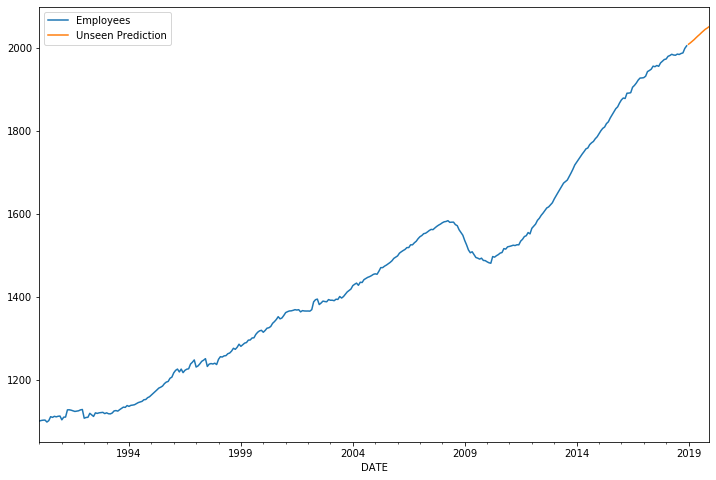

In [40]:
df['Employees'].plot(figsize=(12,8), legend=True)
final.rename('Unseen Prediction').plot(legend=True)